In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
df = pd.read_csv("clean_data.csv")

In [5]:
df = df.drop(columns = ["Unnamed: 0"])

In [6]:
df

job_title  rating  reviews  \
0                                Data Science Engineer     4.2     3985   
1           Senior Engineer - Data Science & Analytics     3.9      791   
2               Manager, Data science, Audit Analytics     0.0        0   
3                 Manager - Data Science and Analytics     3.7     1059   
4                               Analyst - Data Science     4.1     3205   
..                                                 ...     ...      ...   
517  Data Scientist - Specialist in Generative AI a...     3.9    41367   
518                              STAFF, DATA SCIENTIST     3.7     2558   
519                              STAFF, DATA SCIENTIST     3.7     2558   
520                                       Data Analyst     3.9      947   
521                                       Data Analyst     3.6     1152   

     experience  openings  applicants  \
0             2         1          55   
1             8         1          22   
2             3         1          33   
3             5         1          69   
4             0         1         355   
..          ...       ...         ...   
517           4         5         340   
518           8         1          10   
519          10         1          10   
520           3         1         449   
521           4         5        1173   

                                          company_name  \
0    Robert Bosch Engineering and Business Solution...   
1                               UTC  Aerospace Systems   
2                  Standard Chartered Life And Careers   
3                               Tata Consumer Products   
4                                     AMERICAN EXPRESS   
..                                                 ...   
517                                          Hdfc Bank   
518                                            Walmart   
519                                            Walmart   
520                                             Paypal   
521                                           Infogain   

                   location  \
0                 Bengaluru   
1                 Bengaluru   
2                 Bengaluru   
3                 Bengaluru   
4                  Gurugram   
..                      ...   
517      Mumbai (All Areas)   
518               Bengaluru   
519               Bengaluru   
520               Bengaluru   
521  Bengaluru, Delhi / NCR   

                                                Skills  \
0    advanced analytics, Front end, data science, C...   
1    Computer vision, Prototype, Machine learning, ...   
2    Data analysis, Change management, Manager Inte...   
3    Supply chain, Data analysis, Project managemen...   
4    Career development, data science, Finance, Agi...   
..                                                 ...   
517  Data Science, Artificial Intelligence, Machine...   
518  Prototype, data science, Machine learning, SEZ...   
519  Computer vision, Networking, data science, Art...   
520  Diversity and Inclusion, Reconciliation, Regul...   
521                       SQL, Python, Excel, Power Bi   

                        industry_type  
0                          Automobile  
1    Industrial Equipment / Machinery  
2                             Banking  
3                     Food Processing  
4                  Financial Services  
..                                ...  
517                           Banking  
518                            Retail  
519                            Retail  
520                FinTech / Payments  
521          IT Services & Consulting  

[522 rows x 10 columns]

In [7]:
df["Skill_Count"] = df["Skills"].apply(lambda x: len(str(x).split(",")))

In [8]:
df.describe()

rating       reviews  experience    openings    applicants  \
count  522.000000    522.000000  522.000000  522.000000    522.000000   
mean     2.907854   6548.045977    4.934866    2.850575    856.752874   
std      1.595289  15898.769862    3.583869   20.225331   3293.412839   
min      0.000000      0.000000    0.000000    1.000000     10.000000   
25%      2.900000      4.000000    2.000000    1.000000     43.250000   
50%      3.700000    197.000000    4.000000    1.000000    119.000000   
75%      3.900000   2196.000000    7.000000    1.000000    457.500000   
max      5.000000  59291.000000   20.000000  411.000000  50965.000000   

       Skill_Count  
count   522.000000  
mean     10.199234  
std       4.532942  
min       1.000000  
25%       8.000000  
50%      10.000000  
75%      10.000000  
max      26.000000

In [9]:
df[df.isna()].sum()

job_title          0
rating           0.0
reviews          0.0
experience       0.0
openings         0.0
applicants       0.0
company_name       0
location           0
Skills             0
industry_type      0
Skill_Count      0.0
dtype: object

In [10]:
job_title = df["job_title"].value_counts().head(10)

In [12]:
job_title

job_title
Data Scientist            31
Data Analyst              17
Data Science Engineer     12
Data Science Manager      12
Senior Data Scientist      8
Data Science               8
Director Data Science      8
Data Science Analyst       8
Analyst - Data Science     7
Manager, Data Science      6
Name: count, dtype: int64

# Biveriant Analysis

## 1).Company vs Ratings

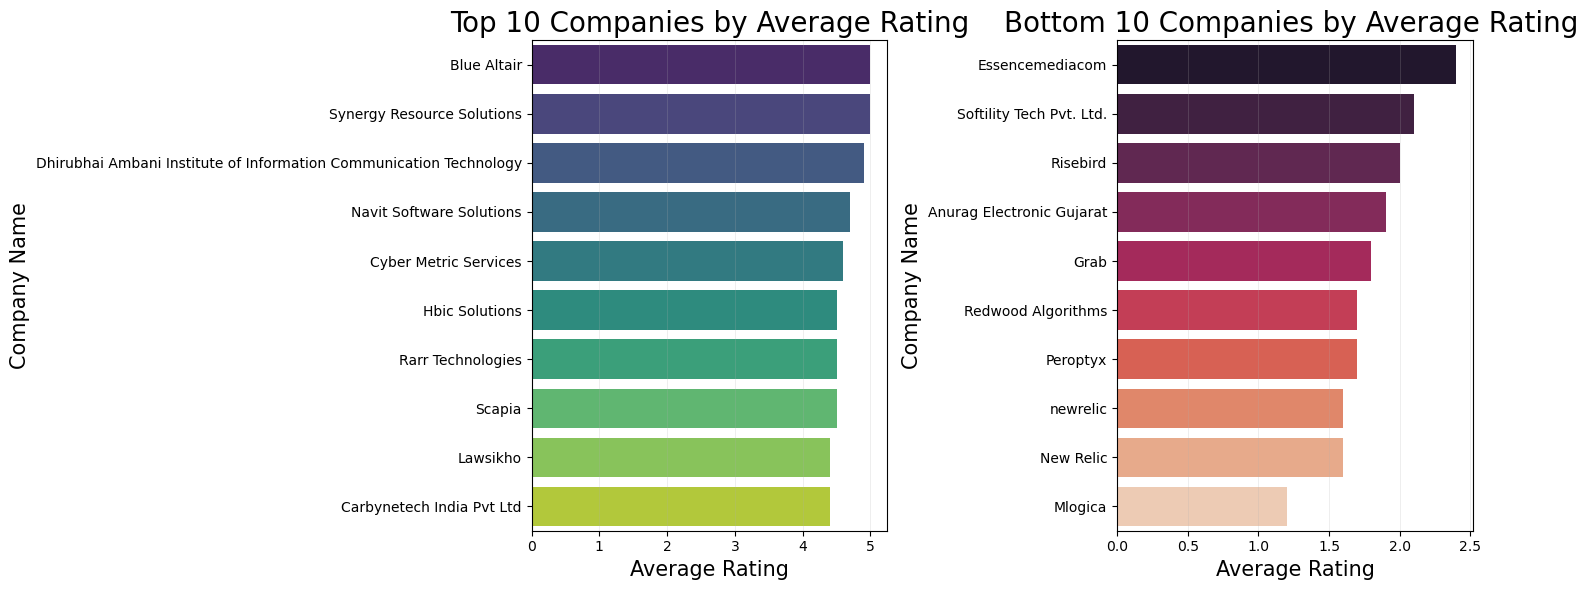

In [29]:
# here we will import some modules 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(15, 6))                       # plot size 
# its helps the summerization of rating data for each company_name 
company_ratings = df.groupby('company_name')['rating'].mean().sort_values(ascending=False)   


plt.subplot(1, 2, 1)
top_companies = company_ratings.head(10)       #here top 10 companies 
sns.barplot(x=top_companies.values, y=top_companies.index, palette="viridis")   # barplot for top 10 companies
plt.title("Top 10 Companies by Average Rating",fontsize=20)
plt.xlabel("Average Rating",fontsize=15)
plt.ylabel("Company Name",fontsize=15)
plt.grid(axis = "x",alpha=0.3,linewidth=0.5)

# Bottom 10 companies plot
plt.subplot(1, 2, 2)
bottom_companies = company_ratings[company_ratings > 0].tail(10)
sns.barplot(x=bottom_companies.values, y=bottom_companies.index, palette="rocket")
plt.title("Bottom 10 Companies by Average Rating ",fontsize=20,color="black")
plt.xlabel("Average Rating",fontsize=15)
plt.ylabel("Company Name",fontsize=15)
plt.grid(axis = "x",alpha=0.3,linewidth=0.5)

plt.tight_layout()
plt.show()


>- ### Analysis about company vs rating

In [32]:
print(company_ratings.head(10))
print()
print("*"*100)
print()
print(company_ratings[company_ratings>0].tail(10))

company_name
Blue Altair                                                           5.0
Synergy Resource Solutions                                            5.0
Dhirubhai Ambani Institute of Information Communication Technology    4.9
Navit Software Solutions                                              4.7
Cyber Metric Services                                                 4.6
Hbic Solutions                                                        4.5
Rarr Technologies                                                     4.5
Scapia                                                                4.5
Lawsikho                                                              4.4
Carbynetech India Pvt Ltd                                             4.4
Name: rating, dtype: float64

****************************************************************************************************

company_name
Essencemediacom              2.4
Softility Tech Pvt. Ltd.     2.1
Risebird                     2.0
Anu

 -**Observations**
 
Blue Altair has the highest average rating (close to 5.0).

Mlogica has the lowest rating (around 1.2).

All top 10 companies have ratings above 4.5.

All bottom 10 companies have ratings below 2.5.

Duplicate entries exist (e.g., New Relic and newrelic), showing data inconsistency.

 -**Insight**
 
_High-rated companies show strong employee satisfaction_, possibly due to good culture, support, and growth.

_Wide rating gap_ between top and bottom companies suggests varying work environments and leadership quality.

_Presence of an educational institution_ among top-rated entities indicates positive intern or training experiences.

_Data cleaning is necessary_ to ensure accurate analysis and avoid duplicate or mismatched entries.

_Low-rated companies may signal red flags_ for job seekers regarding work-life balance, management, or career growth.

## 2).Job_title vs skills

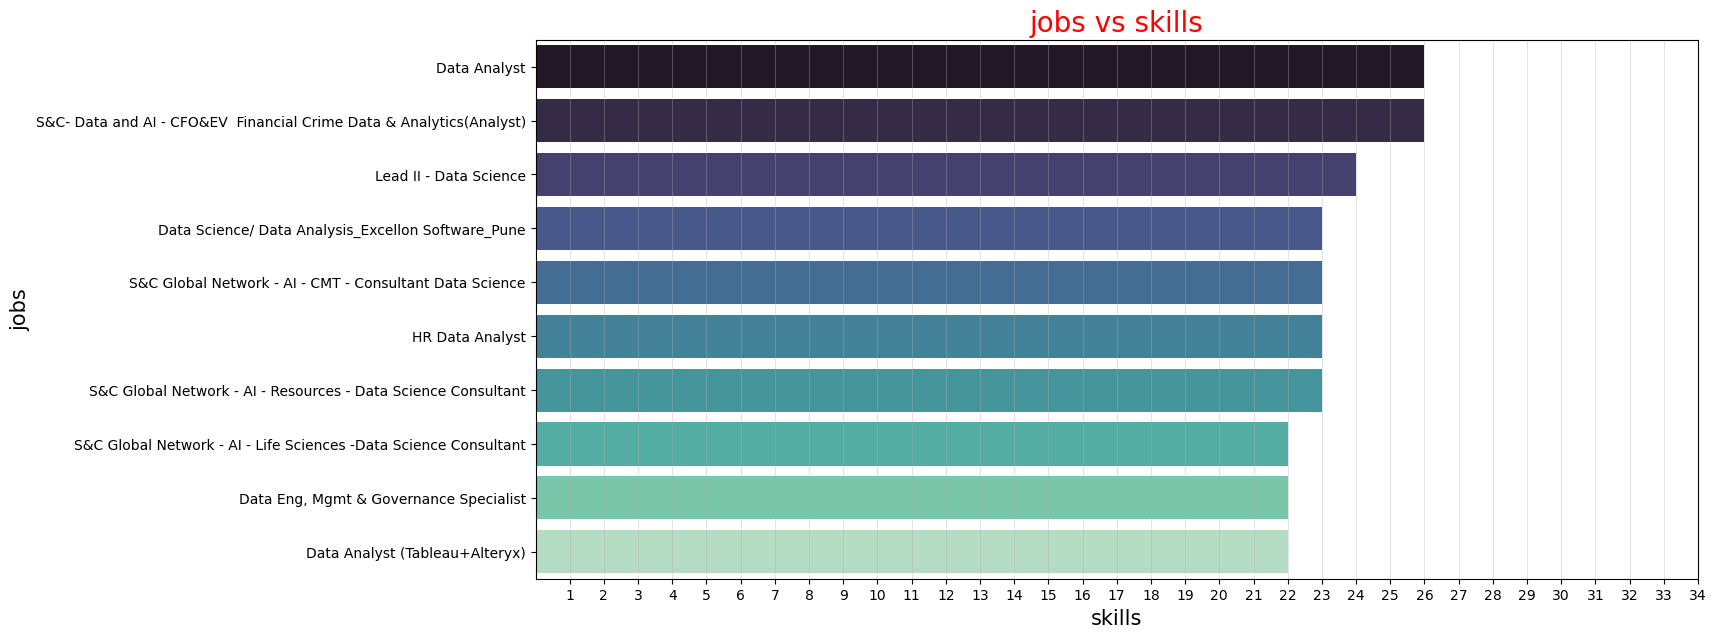

In [36]:
job_vs_skills = df.groupby('job_title')['Skill_Count'].max().sort_values(ascending=False)   # summerize the skill_count for job_title by using groupby mehtod
JOB_TITLE=job_vs_skills.head(10) # taking a top 10 job_titles 
plt.figure(figsize= (15,7))   # size of barplot
sns.barplot(x=JOB_TITLE.values,y=JOB_TITLE.index, palette="mako")  
plt.xticks(range(1,35,1))
plt.title("jobs vs skills",fontsize=20,color="red")
plt.xlabel("skills",fontsize=15,color="black")
plt.ylabel("jobs",fontsize=15,color="black")
plt.grid(axis = "x",alpha=0.5,linewidth=0.5)
plt.show()

>- #### Analysis about job_title vs skills 

In [39]:
print(f" maximum skills {df["Skill_Count"].max()} for Data scientist")
print()
print(job_vs_skills)


 maximum skills 26 for Data scientist

job_title
Data Analyst                                                            26
S&C- Data and AI - CFO&EV  Financial Crime Data & Analytics(Analyst)    26
Lead II - Data Science                                                  24
Data Science/ Data Analysis_Excellon Software_Pune                      23
S&C Global Network - AI - CMT - Consultant Data Science                 23
                                                                        ..
Online interviewer- data science-Julia-Risebird                          3
AVP - Data Science                                                       3
Data Science & Analytics                                                 2
Data Science Analytics                                                   2
Data Science/Modeling Position                                           1
Name: Skill_Count, Length: 321, dtype: int64


**Observations** 

_Data Analyst_ role demands the highest number of skills (26).

The next top job is _“S&C-Data and AI-Analyst”_ with _25 skills_ required.

Most job roles demand _22 to 26 skills_, indicating high expectations across roles.

“Data Analyst (Tableau+Alteryx)” has _one of the lowest skill requirements (22)_ among top jobs.

Multiple job titles from _S&C Global Network_ suggest a major hiring contributor in this domain.
 
 **Insights**
 
_Skill intensity is high_ in data-related roles, requiring diverse tool and domain expertise.

_Generic titles (e.g., Data Analyst)_ require more skills than specialized roles, indicating broader responsibility.

_Visualization tools (like Tableau & Alteryx)_ are included but often in roles needing fewer overall skills.
_Consultant and Lead roles_ are skill-heavy, showing they need cross-functional and advanced capabilities.

Candidates targeting top jobs must _master 20+ relevant skills_ to stay competitive.

## . Industry type vs Location

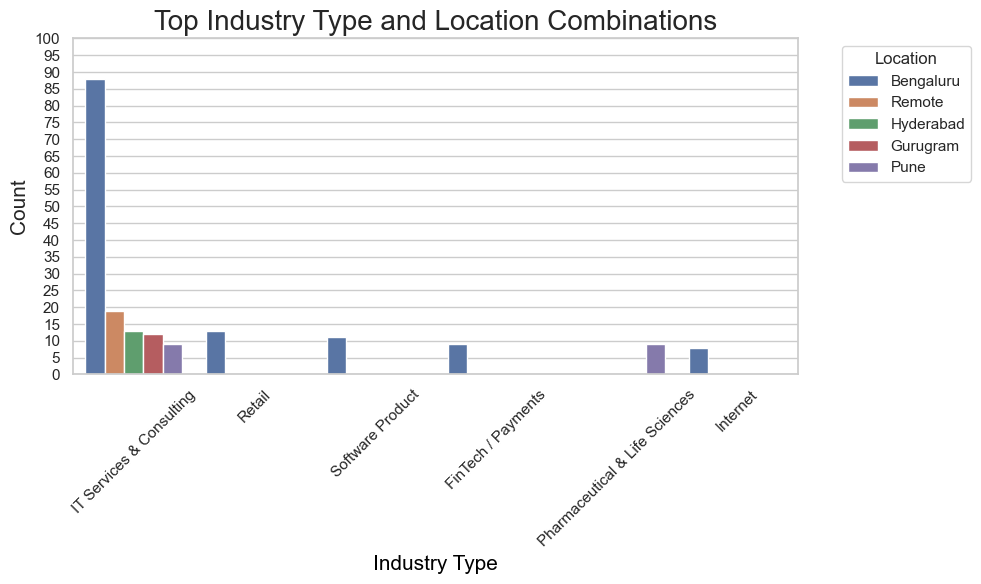

In [111]:
top_10 = df.groupby(['industry_type', 'location']).size().reset_index(name='count').sort_values(by='count', ascending=False).head(10) 
plt.figure(figsize=(10,6))
sns.barplot(data=top_10, x='industry_type', y='count', hue='location') # multiveriant 

plt.xticks(rotation=45)
plt.title('Top Industry Type and Location Combinations',fontsize=20)
plt.xlabel('Industry Type',color='black',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.yticks(range(0,101,5))

plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


>- ## Analysis about industry type vs location

In [534]:
top_10

industry_type   location  count
108        IT Services & Consulting  Bengaluru     88
157        IT Services & Consulting     Remote     19
215                          Retail  Bengaluru     13
121        IT Services & Consulting  Hyderabad     13
117        IT Services & Consulting   Gurugram     12
216                Software Product  Bengaluru     11
151        IT Services & Consulting       Pune      9
94               FinTech / Payments  Bengaluru      9
210  Pharmaceutical & Life Sciences       Pune      9
170                        Internet  Bengaluru      8

In [33]:
# Define keyword-based category mapping
job_title_categories = {
    "Data science": ["data scientist", "data analyst", "data engineer", "machine learning","data science"],
    "Software Development": ["developer", "engineer", "programmer", "software"],
    "DevOps": ["devops", "site reliability", "sre"],
    "Testing": ["tester", "qa", "test engineer"],
    "Management": ["manager", "lead", "head", "director"],
    "Business Analyst": ["business analyst", "ba"],
    "Support": ["support", "helpdesk", "service desk"],
    "Marketing": ["marketing", "seo", "digital marketing"],
    "Design": ["designer", "ux", "ui", "graphic"],
    "Data Analyst":["analyst","ai","analytics","mgmt"]
}

# Function to assign category based on job title
def map_job_category(title):
    title = str(title).lower()
    for category, keywords in job_title_categories.items():
        if any(keyword in title for keyword in keywords):
            return category
    return "Other"

# Apply mapping
df["Job Category"] = df["job_title"].apply(map_job_category)

In [35]:
df["Skill_Count"] = df["Skills"].apply(lambda x: len(str(x).split(",")))

In [43]:
df

job_title  rating  reviews  \
0                                Data Science Engineer     4.2     3985   
1           Senior Engineer - Data Science & Analytics     3.9      791   
2               Manager, Data science, Audit Analytics     0.0        0   
3                 Manager - Data Science and Analytics     3.7     1059   
4                               Analyst - Data Science     4.1     3205   
..                                                 ...     ...      ...   
517  Data Scientist - Specialist in Generative AI a...     3.9    41367   
518                              STAFF, DATA SCIENTIST     3.7     2558   
519                              STAFF, DATA SCIENTIST     3.7     2558   
520                                       Data Analyst     3.9      947   
521                                       Data Analyst     3.6     1152   

     experience  openings  applicants  \
0             2         1          55   
1             8         1          22   
2             3         1          33   
3             5         1          69   
4             0         1         355   
..          ...       ...         ...   
517           4         5         340   
518           8         1          10   
519          10         1          10   
520           3         1         449   
521           4         5        1173   

                                          company_name  \
0    Robert Bosch Engineering and Business Solution...   
1                               UTC  Aerospace Systems   
2                  Standard Chartered Life And Careers   
3                               Tata Consumer Products   
4                                     AMERICAN EXPRESS   
..                                                 ...   
517                                          Hdfc Bank   
518                                            Walmart   
519                                            Walmart   
520                                             Paypal   
521                                           Infogain   

                   location  \
0                 Bengaluru   
1                 Bengaluru   
2                 Bengaluru   
3                 Bengaluru   
4                  Gurugram   
..                      ...   
517      Mumbai (All Areas)   
518               Bengaluru   
519               Bengaluru   
520               Bengaluru   
521  Bengaluru, Delhi / NCR   

                                                Skills  \
0    advanced analytics, Front end, data science, C...   
1    Computer vision, Prototype, Machine learning, ...   
2    Data analysis, Change management, Manager Inte...   
3    Supply chain, Data analysis, Project managemen...   
4    Career development, data science, Finance, Agi...   
..                                                 ...   
517  Data Science, Artificial Intelligence, Machine...   
518  Prototype, data science, Machine learning, SEZ...   
519  Computer vision, Networking, data science, Art...   
520  Diversity and Inclusion, Reconciliation, Regul...   
521                       SQL, Python, Excel, Power Bi   

                        industry_type  Job Category  Skill_Count  
0                          Automobile  Data science           10  
1    Industrial Equipment / Machinery  Data science           10  
2                             Banking  Data science           10  
3                     Food Processing  Data science           10  
4                  Financial Services  Data science            9  
..                                ...           ...          ...  
517                           Banking  Data science            6  
518                            Retail  Data science            9  
519                            Retail  Data science            9  
520                FinTech / Payments  Data science            9  
521          IT Services & Consulting  Data science            4  

[522 rows x 12 columns]

In [45]:
df.to_csv("cleaned data.csv")

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   job_title      522 non-null    object 
 1   rating         522 non-null    float64
 2   reviews        522 non-null    int64  
 3   experience     522 non-null    int64  
 4   openings       522 non-null    int64  
 5   applicants     522 non-null    int64  
 6   company_name   522 non-null    object 
 7   location       522 non-null    object 
 8   Skills         522 non-null    object 
 9   industry_type  522 non-null    object 
 10  Job Category   522 non-null    object 
 11  Skill_Count    522 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 49.1+ KB


In [168]:
df.columns

Index(['Unnamed: 0', 'job_title', 'rating', 'reviews', 'experience',
       'openings', 'applicants', 'company_name', 'location', 'Skills',
       'industry_type', 'Skill_Count', 'Job Category'],
      dtype='object')

Text(0.5, 0, 'no of openings')

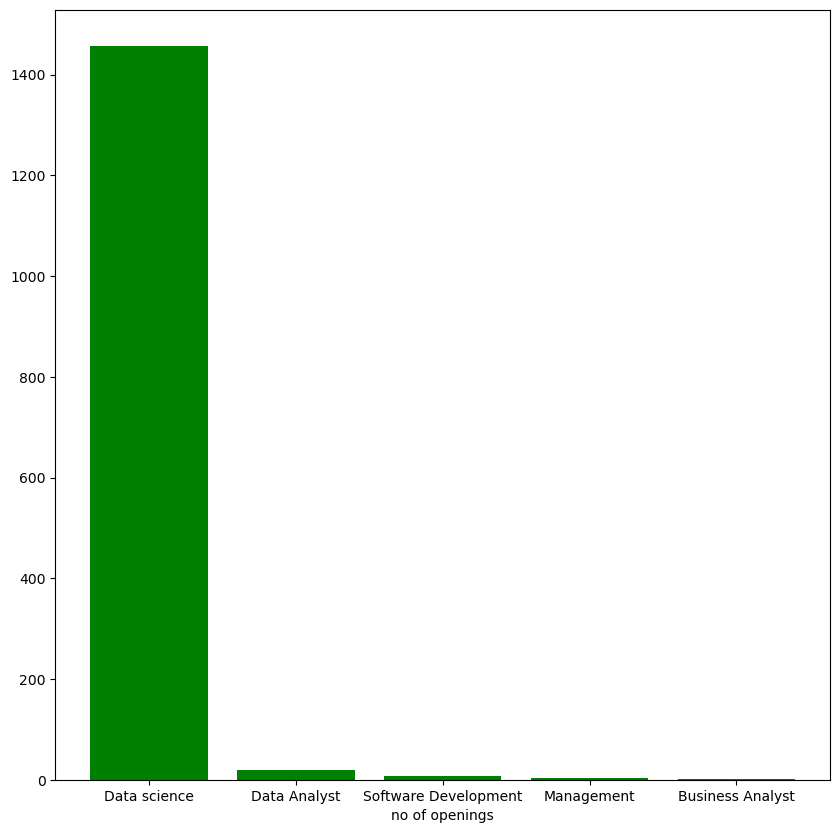

In [242]:
jcvso=df.groupby("Job Category")["openings"].sum().sort_values(ascending=False).head()
plt.figure(figsize=(10,10))
plt.bar(x=jcvso.index, height=jcvso.values, color="g")
#plt.xticks(range=(0,1500,50))
plt.xlabel("no of openings")

In [184]:
df["openings"].count()

522

In [186]:
df["openings"].sum()

1488

In [212]:
jcvso

Job Category
Data science            1456
Data Analyst              20
Software Development       8
Management                 3
Business Analyst           1
Name: openings, dtype: int64

## 5).job category vs openings

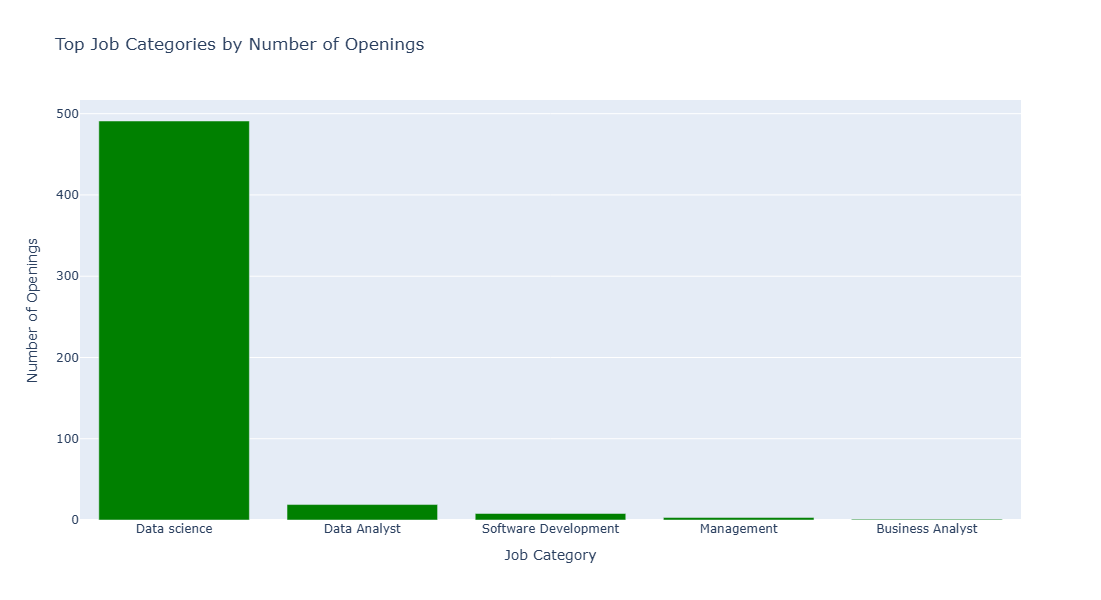

In [113]:
import plotly.express as px

# Data aggregation (same as your original)
jcvso = df.groupby("Job Category")["openings"].count().sort_values(ascending=False).head()

# Convert Series to DataFrame for Plotly
plot_df = jcvso.reset_index()

# Plotly bar chart
fig = px.bar(
    plot_df,
    x="Job Category",
    y="openings",
    color_discrete_sequence=["green"],
    labels={"Job Category": "Job Category", "openings": "Number of Openings"},
    title="Top Job Categories by Number of Openings"
)

fig.update_layout(
    xaxis_title="Job Category",
    yaxis_title="Number of Openings",
    height=600,
    width=800
)

fig.show()


>- ### Analysis about Which category having more openings 

## 6).Job_title vs Experience

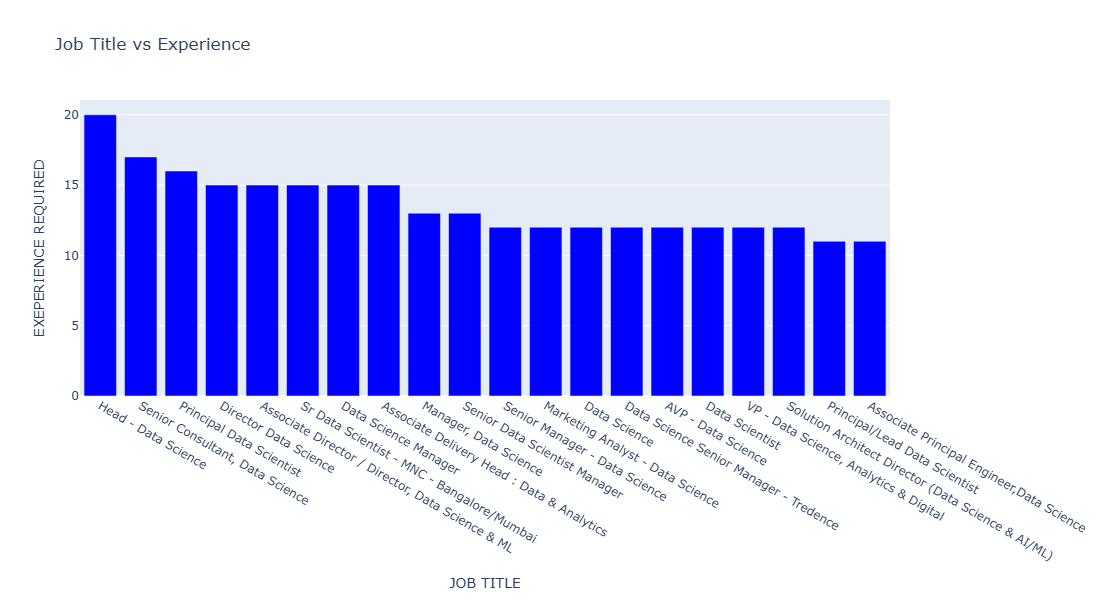

In [115]:
import plotly.express as px

# Data aggregation (same as your original)
job_vs_exp = df.groupby("job_title")["experience"].max().sort_values(ascending=False).head(20)

# Convert Series to DataFrame for Plotly
plot_df = job_vs_exp.reset_index()

# Plotly bar chart
fig = px.bar(
    plot_df,
    x="job_title",
    y="experience",
    color_discrete_sequence=["blue"],
    labels={"job_title": "job_title", "experience": "experience"},
    title="Job Title vs Experience"
)

fig.update_layout(
    xaxis_title="JOB TITLE",
    yaxis_title="EXEPERIENCE REQUIRED",
    height=600,
    width=800
)

fig.show()


In [20]:
job_vs_exp

job_title
Head - Data Science                                   20
Senior Consultant, Data Science                       17
Principal Data Scientist                              16
Director Data Science                                 15
Associate Director / Director, Data Science & ML      15
Sr Data Scientist - MNC - Bangalore/Mumbai            15
Data Science Manager                                  15
Associate Delivery Head : Data & Analytics            15
Manager, Data Science                                 13
Senior Data Scientist Manager                         13
Senior Manager - Data Science                         12
Marketing Analyst - Data Science                      12
Data Science                                          12
Data Science Senior Manager - Tredence                12
AVP - Data Science                                    12
Data Scientist                                        12
VP - Data Science, Analytics & Digital                12
Solution Architect Di

In [558]:
jcvso

job_title
Head - Data Science                                   20
Senior Consultant, Data Science                       17
Principal Data Scientist                              16
Director Data Science                                 15
Associate Director / Director, Data Science & ML      15
Sr Data Scientist - MNC - Bangalore/Mumbai            15
Data Science Manager                                  15
Associate Delivery Head : Data & Analytics            15
Manager, Data Science                                 13
Senior Data Scientist Manager                         13
Senior Manager - Data Science                         12
Marketing Analyst - Data Science                      12
Data Science                                          12
Data Science Senior Manager - Tredence                12
AVP - Data Science                                    12
Data Scientist                                        12
VP - Data Science, Analytics & Digital                12
Solution Architect Di

In [278]:
df[df["job_title"]=="Head - Data Science"]

Unnamed: 0            job_title  rating  reviews  experience  openings  \
132         132  Head - Data Science     1.2        8          20         1   

     applicants company_name            location  \
132         527      Mlogica  Mumbai (All Areas)   

                                                Skills  \
132  Data Science, Artificial Intelligence, Machine...   

                industry_type  Skill_Count  Job Category  
132  IT Services & Consulting            3  Data science

## With outliers 

In [32]:
df

Unnamed: 0                                          job_title  rating  \
0             0                              Data Science Engineer     4.2   
1             1         Senior Engineer - Data Science & Analytics     3.9   
2             2             Manager, Data science, Audit Analytics     0.0   
3             3               Manager - Data Science and Analytics     3.7   
4             4                             Analyst - Data Science     4.1   
..          ...                                                ...     ...   
517         517  Data Scientist - Specialist in Generative AI a...     3.9   
518         518                              STAFF, DATA SCIENTIST     3.7   
519         519                              STAFF, DATA SCIENTIST     3.7   
520         520                                       Data Analyst     3.9   
521         521                                       Data Analyst     3.6   

     reviews  experience  openings  applicants  \
0       3985           2         1          55   
1        791           8         1          22   
2          0           3         1          33   
3       1059           5         1          69   
4       3205           0         1         355   
..       ...         ...       ...         ...   
517    41367           4         5         340   
518     2558           8         1          10   
519     2558          10         1          10   
520      947           3         1         449   
521     1152           4         5        1173   

                                          company_name  \
0    Robert Bosch Engineering and Business Solution...   
1                               UTC  Aerospace Systems   
2                  Standard Chartered Life And Careers   
3                               Tata Consumer Products   
4                                     AMERICAN EXPRESS   
..                                                 ...   
517                                          Hdfc Bank   
518                                            Walmart   
519                                            Walmart   
520                                             Paypal   
521                                           Infogain   

                   location  \
0                 Bengaluru   
1                 Bengaluru   
2                 Bengaluru   
3                 Bengaluru   
4                  Gurugram   
..                      ...   
517      Mumbai (All Areas)   
518               Bengaluru   
519               Bengaluru   
520               Bengaluru   
521  Bengaluru, Delhi / NCR   

                                                Skills  \
0    advanced analytics, Front end, data science, C...   
1    Computer vision, Prototype, Machine learning, ...   
2    Data analysis, Change management, Manager Inte...   
3    Supply chain, Data analysis, Project managemen...   
4    Career development, data science, Finance, Agi...   
..                                                 ...   
517  Data Science, Artificial Intelligence, Machine...   
518  Prototype, data science, Machine learning, SEZ...   
519  Computer vision, Networking, data science, Art...   
520  Diversity and Inclusion, Reconciliation, Regul...   
521                       SQL, Python, Excel, Power Bi   

                        industry_type  Skill_Count  
0                          Automobile           10  
1    Industrial Equipment / Machinery           10  
2                             Banking           10  
3                     Food Processing           10  
4                  Financial Services            9  
..                                ...          ...  
517                           Banking            6  
518                            Retail            9  
519                            Retail            9  
520                FinTech / Payments            9  
521          IT Services & Consulting            4  

[522 rows x 12 columns]

>-  ### with outliers analysis

In [29]:
df.columns

Index(['Unnamed: 0', 'job_title', 'rating', 'reviews', 'experience',
       'openings', 'applicants', 'company_name', 'location', 'Skills',
       'industry_type', 'Skill_Count'],
      dtype='object')

<Axes: ylabel='openings'>

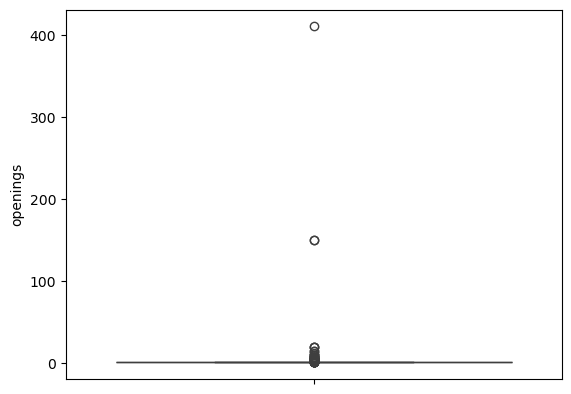

In [35]:
sns.boxplot(df["openings"])

<Axes: ylabel='reviews'>

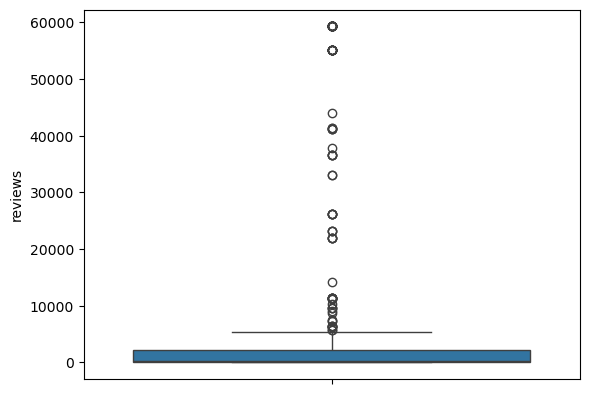

In [31]:
sns.boxplot(df["reviews"])

<Axes: ylabel='applicants'>

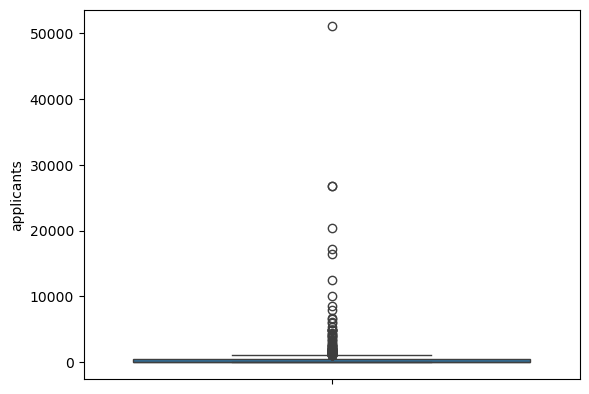

In [33]:
sns.(df["applicants"])

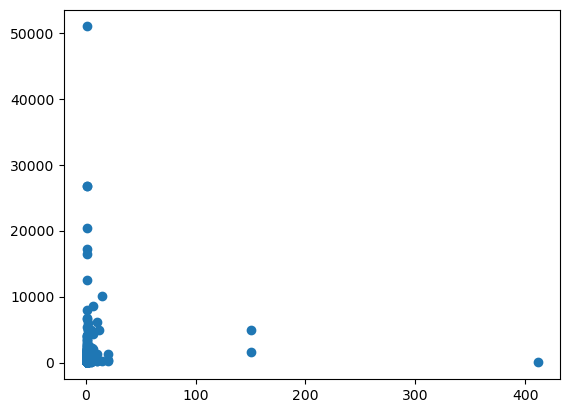

In [63]:
plt.scatter(x=["openings"],y=["applicants"],data=d)

# UNIVARIENT ANALYSIS

C:\Users\giriy\AppData\Local\Temp\ipykernel_18476\3924839850.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='experience', data=df, palette='viridis')
C:\Users\giriy\AppData\Local\Temp\ipykernel_18476\3924839850.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Skill_Count', data=df, palette='magma')


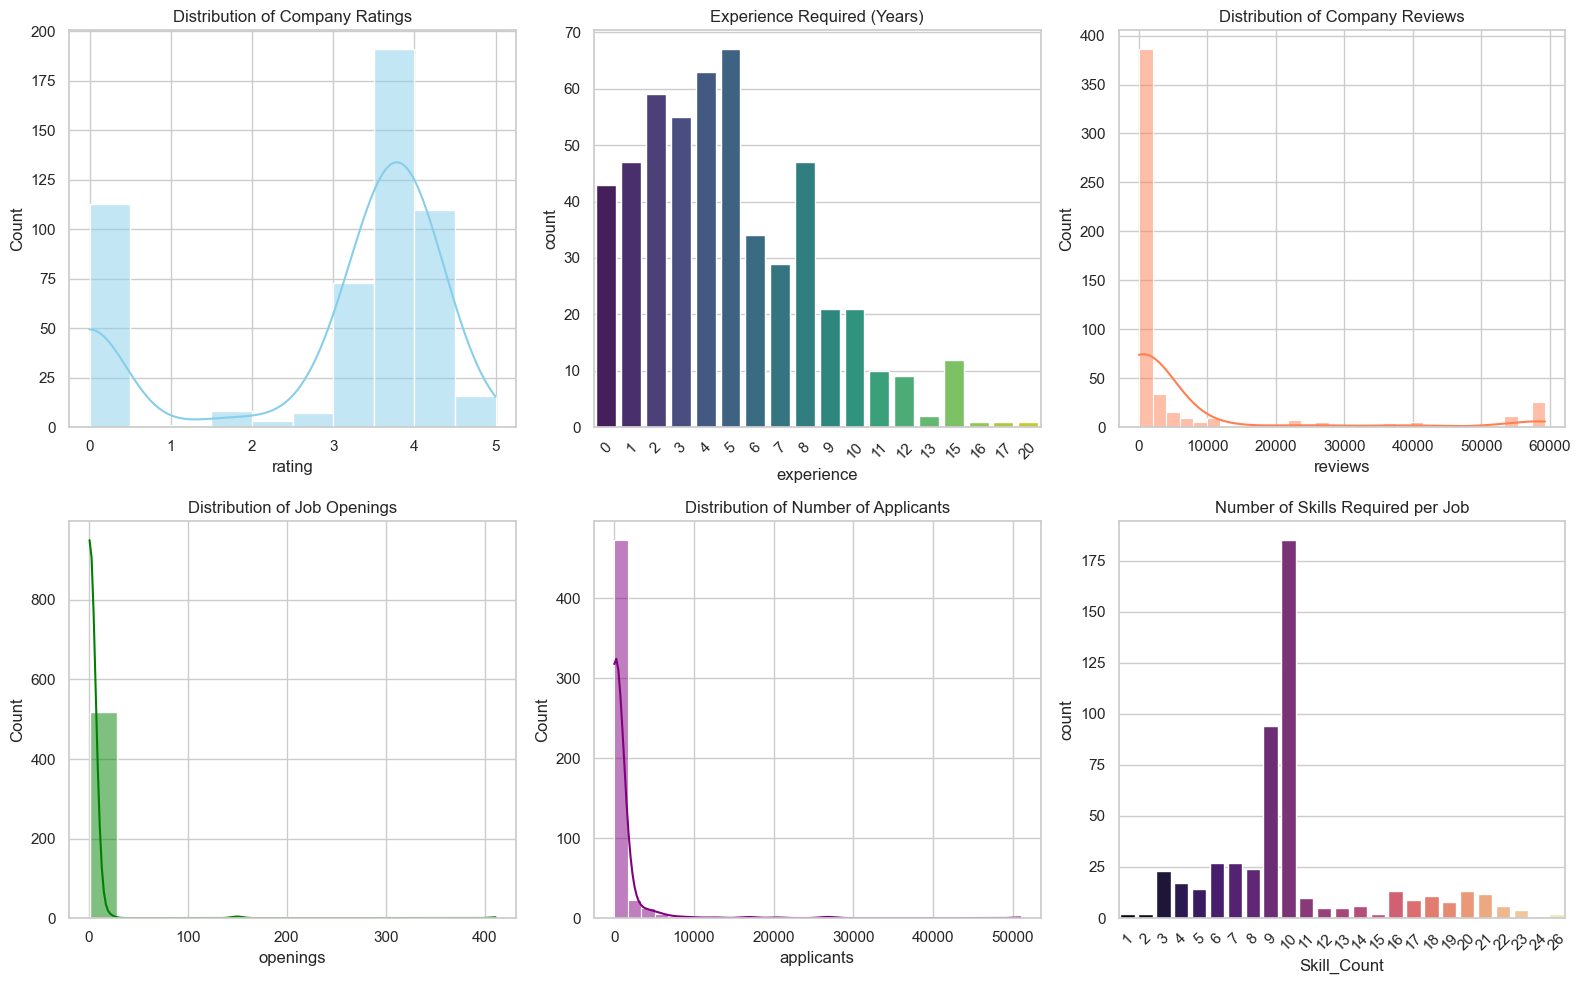

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("cleaned data.csv")

# Set the style for plots
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

# Plot 1: Distribution of Ratings
plt.subplot(2, 3, 1)
sns.histplot(df['rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Company Ratings')

# Plot 2: Experience Required
plt.subplot(2, 3, 2)
sns.countplot(x='experience', data=df, palette='viridis')
plt.title('Experience Required (Years)')
plt.xticks(rotation=45)

# Plot 3: Number of Reviews
plt.subplot(2, 3, 3)
sns.histplot(df['reviews'], bins=30, color='coral', kde=True)
plt.title('Distribution of Company Reviews')

# Plot 4: Number of Openings
plt.subplot(2, 3, 4)
sns.histplot(df['openings'], bins=15, color='green', kde=True)
plt.title('Distribution of Job Openings')

# Plot 5: Number of Applicants
plt.subplot(2, 3, 5)
sns.histplot(df['applicants'], bins=30, color='purple', kde=True)
plt.title('Distribution of Number of Applicants')

# Plot 6: Skill Count per Job
plt.subplot(2, 3, 6)
sns.countplot(x='Skill_Count', data=df, palette='magma')
plt.title('Number of Skills Required per Job')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


C:\Users\giriy\AppData\Local\Temp\ipykernel_18476\1364203749.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette='coolwarm')
C:\Users\giriy\AppData\Local\Temp\ipykernel_18476\1364203749.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, palette='Set2')
C:\Users\giriy\AppData\Local\Temp\ipykernel_18476\1364203749.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='plasma')
C:\Users

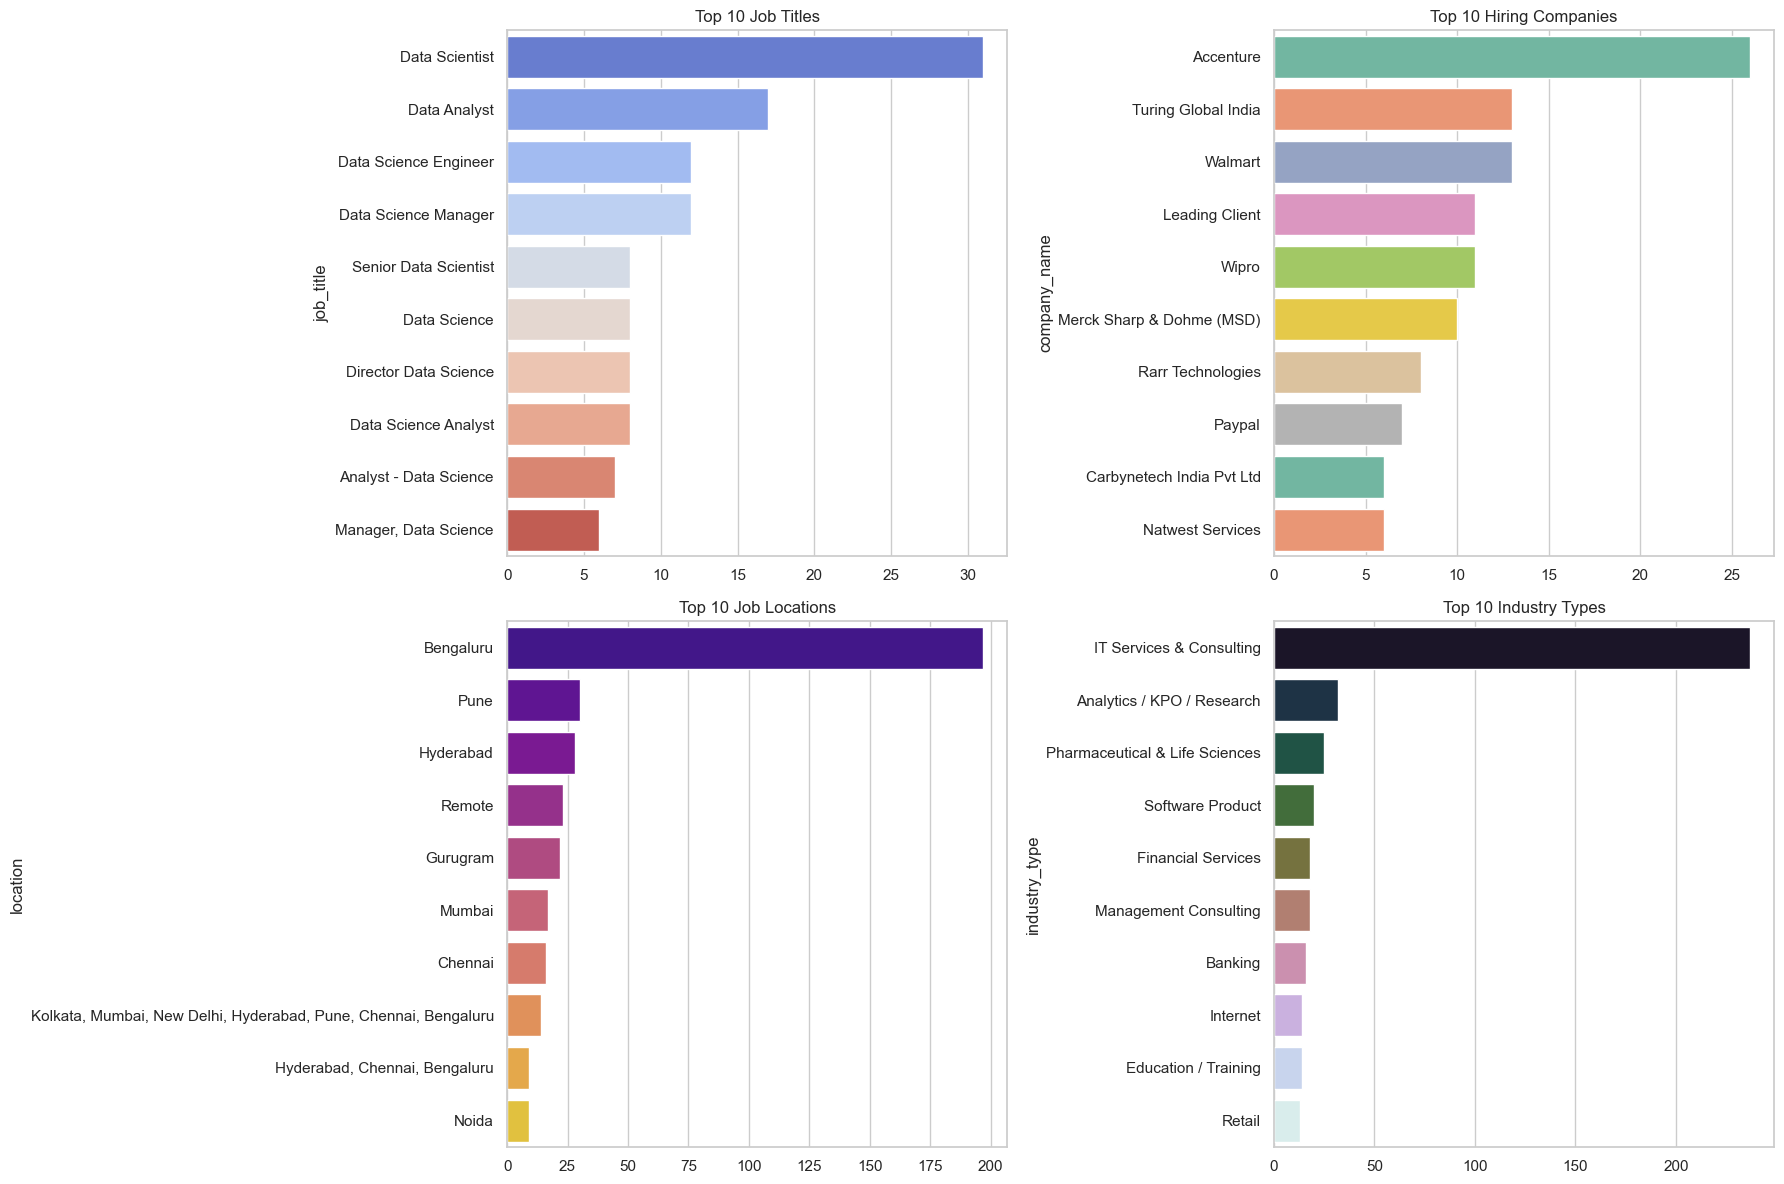

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("cleaned data.csv")

# Set style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(18, 12))

# Plot 1: Top 10 Job Titles
plt.subplot(2, 2, 1)
top_job_titles = df['job_title'].value_counts().head(10)
sns.barplot(x=top_job_titles.values, y=top_job_titles.index, palette='coolwarm')
plt.title('Top 10 Job Titles')

# Plot 2: Top 10 Hiring Companies
plt.subplot(2, 2, 2)
top_companies = df['company_name'].value_counts().head(10)
sns.barplot(x=top_companies.values, y=top_companies.index, palette='Set2')
plt.title('Top 10 Hiring Companies')

# Plot 3: Top 10 Job Locations
plt.subplot(2, 2, 3)
top_locations = df['location'].value_counts().head(10)
sns.barplot(x=top_locations.values, y=top_locations.index, palette='plasma')
plt.title('Top 10 Job Locations')

# Plot 4: Top 10 Industry Types
plt.subplot(2, 2, 4)
top_industries = df['industry_type'].value_counts().head(10)
sns.barplot(x=top_industries.values, y=top_industries.index, palette='cubehelix')
plt.title('Top 10 Industry Types')

plt.tight_layout()
plt.show()


## without outliers

In [34]:
df.columns

Index(['Unnamed: 0', 'job_title', 'rating', 'reviews', 'experience',
       'openings', 'applicants', 'company_name', 'location', 'Skills',
       'industry_type', 'Skill_Count'],
      dtype='object')

In [ ]:
lst=[

In [ ]:
for i in lst:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    
    Lower_val = Q1 - 1.5 * IQR
    Upper_val = Q3 + 1.5 * IQR
    without_outliers = df[(df[i] >= Lower_val) & (df[i] <= Upper_val)]

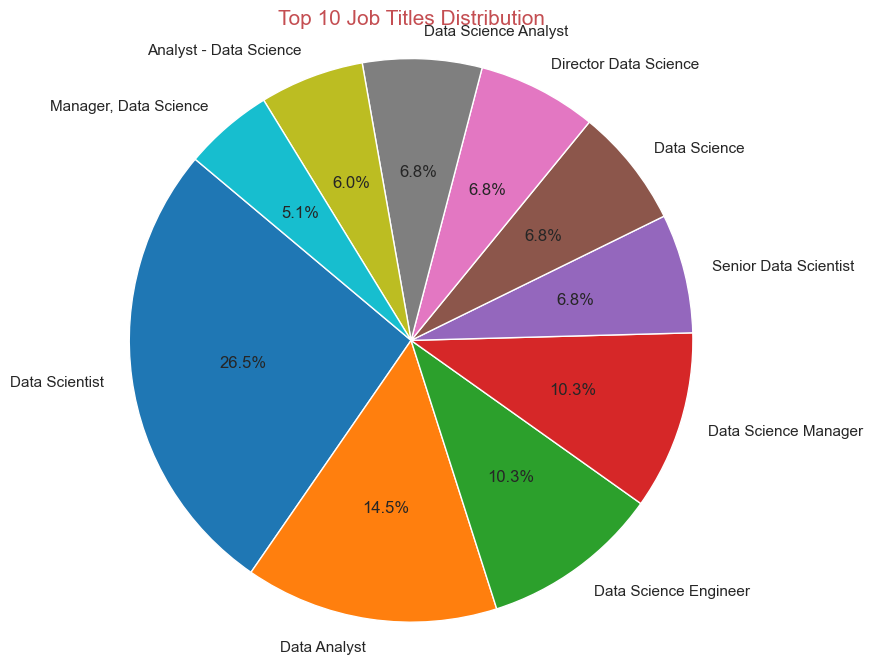

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("cleaned data.csv")  # Make sure this file is in your working directory

# Get top 10 job titles
top_job_titles = df['job_title'].value_counts().head(10)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_job_titles.values,
    labels=top_job_titles.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('tab10')
)
plt.title('Top 10 Job Titles Distribution',color = "r", fontsize  = 15)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


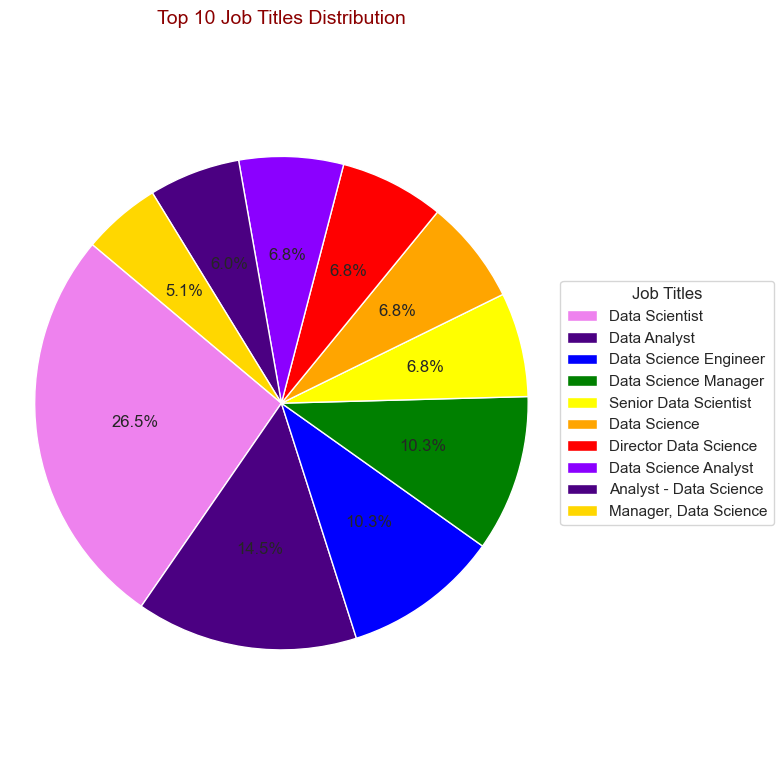

In [158]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("cleaned data.csv")

# Get top 10 job titles
top_job_titles = df['job_title'].value_counts().head(10)

# VIBGYOR color list (approximate RGB/hex values)
vibgyor_colors = ['violet', 'indigo', 'blue', 'green', 'yellow', 'orange', 'red', '#8B00FF', '#4B0082', '#FFD700']

# Plotting the pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    top_job_titles.values,
    labels=None,  # We’ll use legend instead of direct labels
    autopct='%1.1f%%',
    startangle=140,
    colors=vibgyor_colors
)

# Add legend with job titles
plt.legend(wedges, top_job_titles.index, title="Job Titles", bbox_to_anchor=(1, 0.5), loc="center left")

# Title and aesthetics
plt.title('Top 10 Job Titles Distribution', color="darkred", fontsize=14)
plt.axis('equal')  # Equal aspect ratio

plt.tight_layout()
plt.show()


C:\Users\giriy\AppData\Local\Temp\ipykernel_18476\2532471682.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




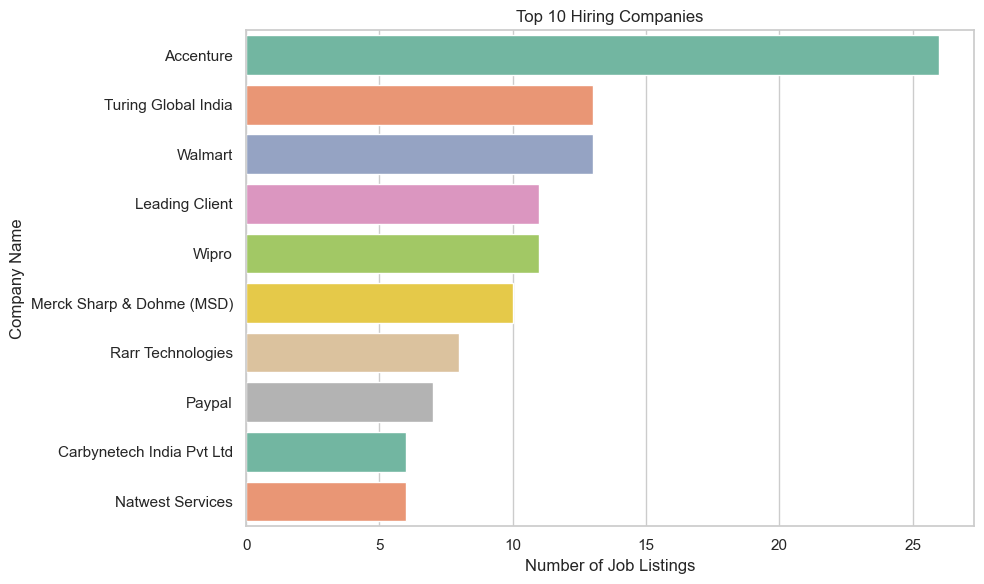

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv(aa"cleaned data.csv")

# Get top 10 companies by frequency
top_companies = df['company_name'].value_counts().head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_companies.values, y=top_companies.index, palette='Set2')
plt.title('Top 10 Hiring Companies')
plt.xlabel('Number of Job Listings')
plt.ylabel('Company Name')
plt.tight_layout()
plt.show()


In [ ]:
Hiring Dominated by a Few Companies

A small number of companies post a large share of job listings. The top 3–4 firms may account for over 50% of the jobs in the top 10 list.

This shows that hiring in Data Science is centralized among a few aggressive recruiters.

C:\Users\giriy\AppData\Local\Temp\ipykernel_18476\1123638002.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')


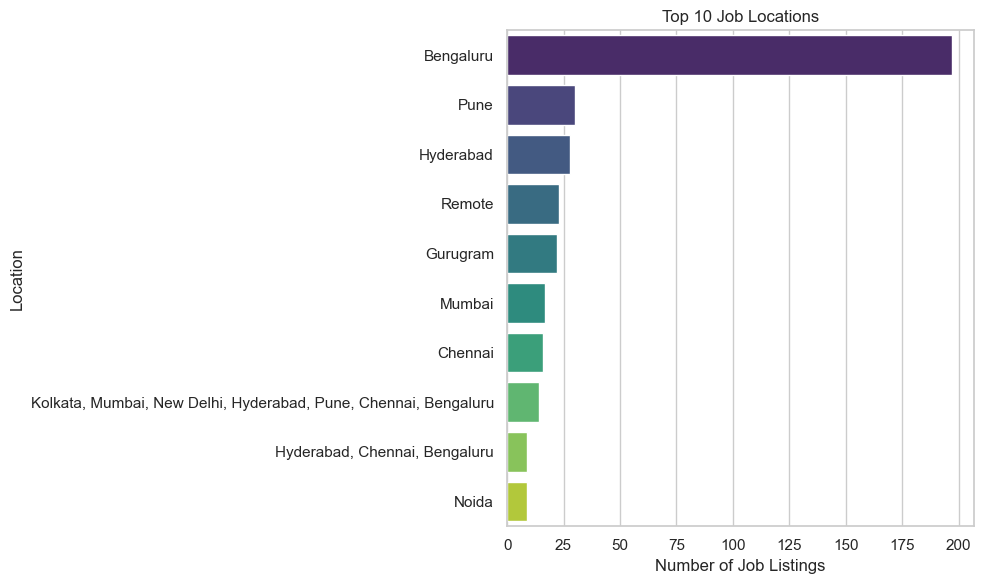

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("cleaned data.csv")  # Ensure the CSV file is in your working directory

# Get the top 10 job locations by frequency
top_locations = df['location'].value_counts().head(10)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')
plt.title('Top 10 Job Locations')
plt.xlabel('Number of Job Listings')
plt.ylabel('Location')
plt.tight_layout()
plt.show()


In [61]:
! pip install wordcloud

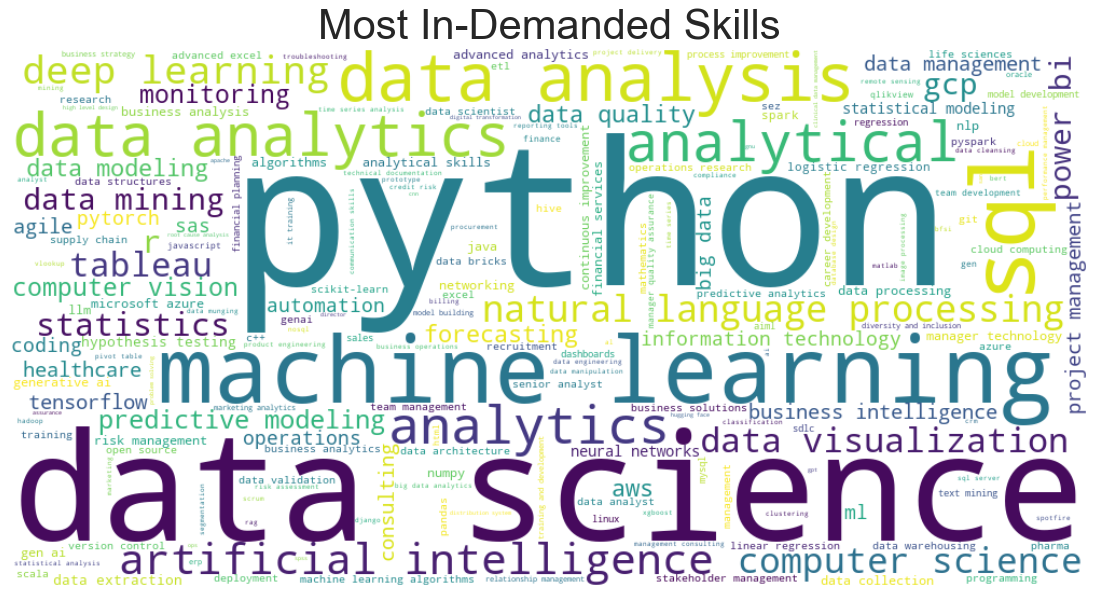

In [65]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

all_skills = []

df["Skills"].str.split(",").apply(lambda skills: all_skills.extend([skill.strip().lower() for skill in skills]))

skill_freq = Counter(all_skills)

wc = WordCloud(width=1000, height=500, background_color='white', colormap='viridis')
wc.generate_from_frequencies(skill_freq)

plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Most In-Demanded Skills", fontsize=30)
plt.show()

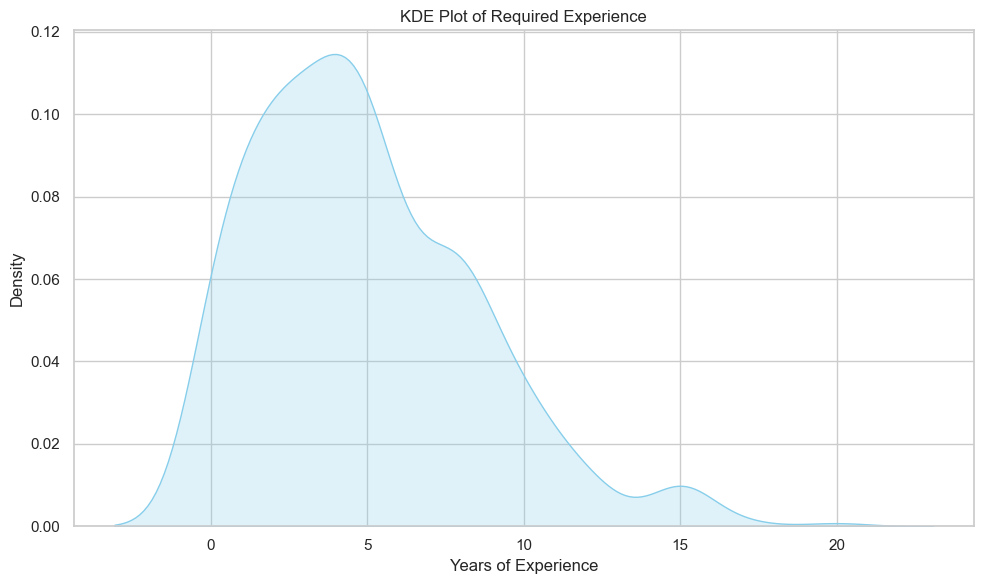

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("cleaned data.csv")  # Make sure the file is in the same directory

# KDE plot for 'experience'
plt.figure(figsize=(10, 6))
sns.kdeplot(df['experience'], fill=True, color='skyblue')
plt.title('KDE Plot of Required Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()
plt.show()



C:\Users\giriy\AppData\Local\Temp\ipykernel_18476\2687155205.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x='Skill_Count', data=df, palette='magma')


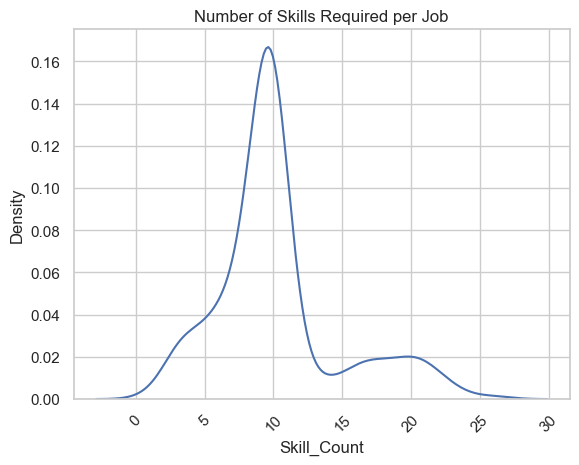

In [79]:
sns.kdeplot(x='Skill_Count', data=df, palette='magma')
plt.title('Number of Skills Required per Job')
plt.xticks(rotation=45)
plt.show()

C:\Users\giriy\AppData\Local\Temp\ipykernel_18476\3150520535.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Skill_Count', data=df, palette='magma')


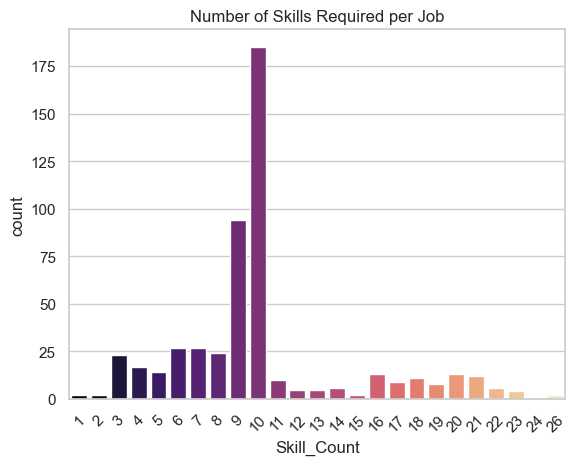

In [83]:
sns.countplot(x='Skill_Count', data=df, palette='magma')
plt.title('Number of Skills Required per Job')
plt.xticks(rotation=45)
plt.show()

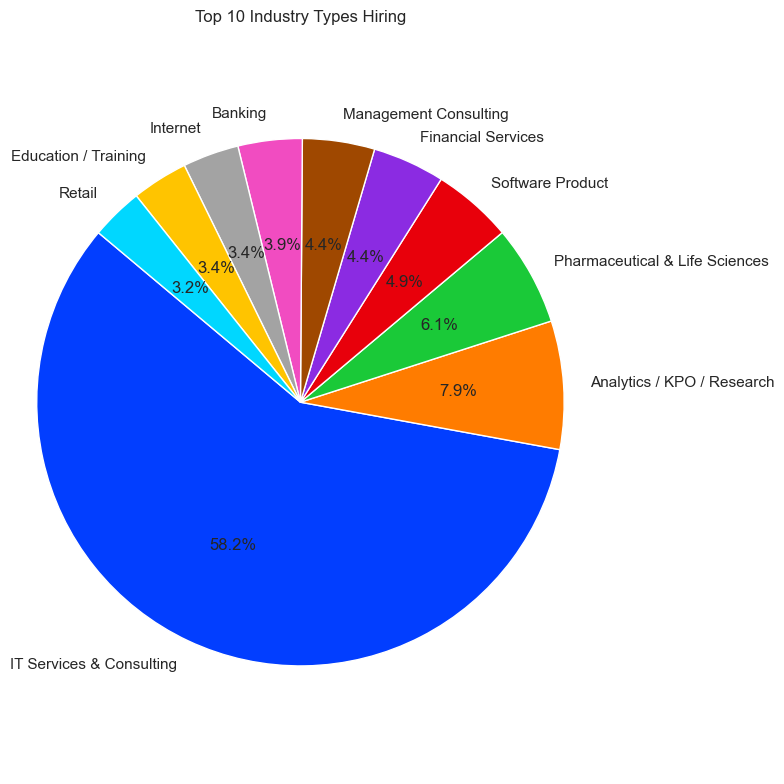

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("cleaned data.csv")

# Get the top industry types (you can limit to top 10 for clarity)
top_industries = df['industry_type'].value_counts().head(10)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    top_industries.values,
    labels=top_industries.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('bright')
)
plt.title('Top 10 Industry Types Hiring')
plt.axis('equal')  # Makes the pie a perfect circle
plt.tight_layout()
plt.show()


C:\Users\giriy\AppData\Local\Temp\ipykernel_18476\4060017638.py:13: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\giriy\AppData\Local\Temp\ipykernel_18476\4060017638.py:20: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



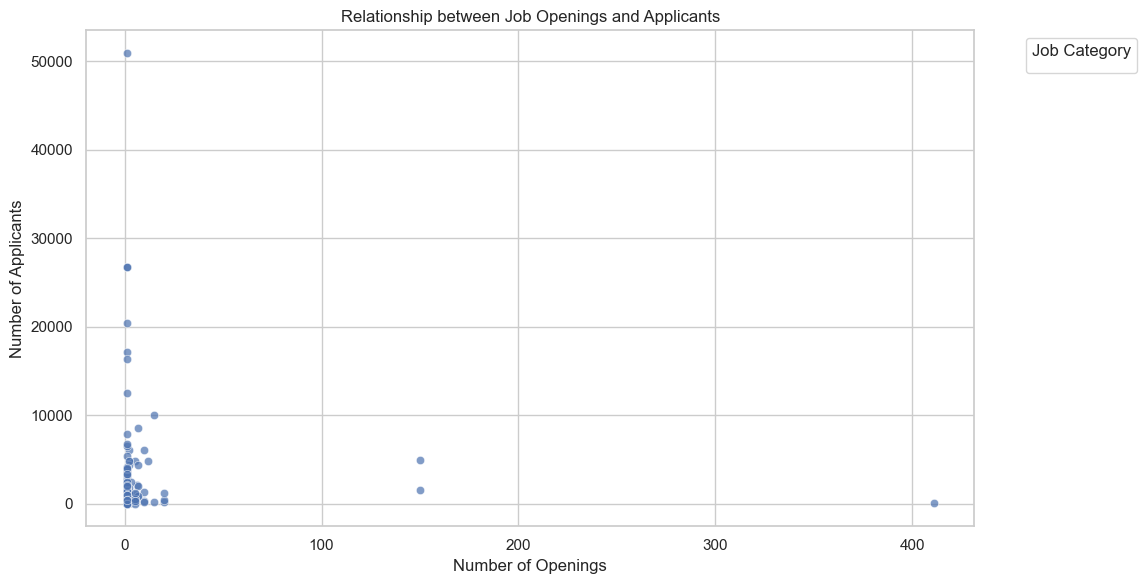

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("cleaned data.csv")

# Remove rows with missing values in 'Openings' or 'Applicants'
df = df.dropna(subset=['openings', 'applicants'])

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='openings', y='applicants',alpha=0.7, palette='bright')

plt.title('Relationship between Job Openings and Applicants')
plt.xlabel('Number of Openings')
plt.ylabel('Number of Applicants')
plt.grid(True)
plt.tight_layout()
plt.legend(title='Job Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<Axes: xlabel='openings', ylabel='applicants'>

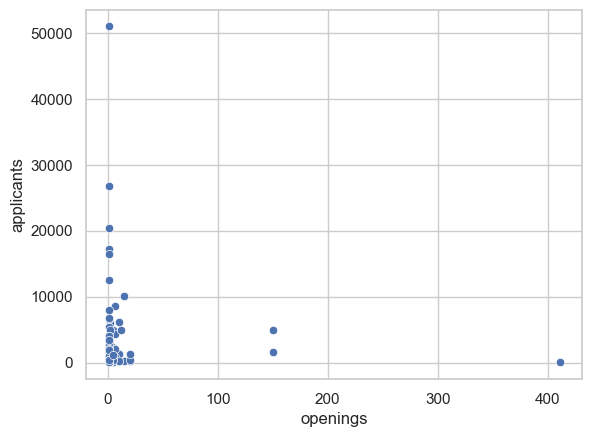

In [147]:
sns.scatterplot(x = df["openings"],y = df["applicants"])